## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [1]:
# Start solution here
import pandas as pd
import os 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score
)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
url = "https://raw.githubusercontent.com/jpshannon59/EDAP/main/imdb_top_1000.csv"

In [2]:
df = pd.read_csv(url)
df.set_index("Series_Title", drop=False)
df.head(10)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
6,https://m.media-amazon.com/images/M/MV5BNGNhMD...,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
9,https://m.media-amazon.com/images/M/MV5BMmEzNT...,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"


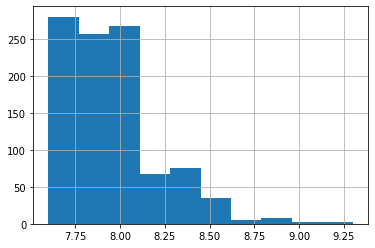

In [4]:
df["IMDB_Rating"].describe()

count    1000.000000
mean        7.949300
std         0.275491
min         7.600000
25%         7.700000
50%         7.900000
75%         8.100000
max         9.300000
Name: IMDB_Rating, dtype: float64

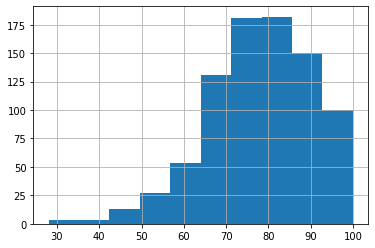

In [5]:
df["Meta_score"].hist()

In [6]:
df["Meta_score"].describe()

count    843.000000
mean      77.971530
std       12.376099
min       28.000000
25%       70.000000
50%       79.000000
75%       87.000000
max      100.000000
Name: Meta_score, dtype: float64

In [7]:
# These values are based off the column description
def rating_category(rating):
  if rating <= 7.7:
    return "Bottom Quartile"
  elif rating <=7.9:
    return "Lower Middle Quartile"
  elif rating <=8.1:
    return "Upper Middle Quartile"
  else:
    return "Top Quartile"

In [8]:
def score_category(rating):
  if rating <= 70:
    return "Bottom Quartile"
  elif rating <=79:
    return "Lower Middle Quartile"
  elif rating <=87:
    return "Upper Middle Quartile"
  else:
    return "Top Quartile"

In [9]:
# I put the IMDB Rating and Meta Score into 4 categories based on quartiles.
df["IMDB_Rating_Category"] = df["IMDB_Rating"].apply(rating_category)
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDB_Rating_Category
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",Top Quartile
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Top Quartile
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Top Quartile
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",Top Quartile
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",Top Quartile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,Bottom Quartile
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,Bottom Quartile
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000",Bottom Quartile
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,Bottom Quartile


In [10]:
df["Meta_Score_Category"] = df["Meta_score"].apply(score_category)
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDB_Rating_Category,Meta_Score_Category
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",Top Quartile,Upper Middle Quartile
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Top Quartile,Top Quartile
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Top Quartile,Upper Middle Quartile
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",Top Quartile,Top Quartile
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",Top Quartile,Top Quartile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,Bottom Quartile,Lower Middle Quartile
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,Bottom Quartile,Upper Middle Quartile
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000",Bottom Quartile,Upper Middle Quartile
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,Bottom Quartile,Lower Middle Quartile


In [11]:
# I one-hot encode the genre
genres = set()

for i, row in df.iterrows():
  row_genres = row["Genre"].split(",")
  for g in row_genres:
    genres.add(g.strip())
    
print("The set of genres available is: ", genres)

The set of genres available is:  {'Animation', 'Thriller', 'Mystery', 'Sci-Fi', 'Western', 'Biography', 'Sport', 'Crime', 'War', 'Romance', 'Fantasy', 'Music', 'Action', 'Horror', 'Film-Noir', 'Adventure', 'Drama', 'History', 'Family', 'Musical', 'Comedy'}


In [12]:
# Since there can be multiple genres in each row
for g in genres:
  colname = "is_" + g
  col_values = []
  for i, r in df.iterrows():
    if r["Genre"].find(g)>-1:
      col_values.append(1)
    else:
      col_values.append(0)
  df[colname] = col_values

In [13]:
# Drop genre because I created dummies
df.drop("Genre", inplace = True, axis = 1)

In [14]:
# One-hot encode the certificate
cert_dummies = pd.get_dummies(df["Certificate"],prefix='Certificate',drop_first=True)

In [15]:
df_new = pd.concat([df, cert_dummies], axis=1)
df_new

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,IMDB_Rating_Category,Meta_Score_Category,is_Animation,is_Thriller,is_Mystery,is_Sci-Fi,is_Western,is_Biography,is_Sport,is_Crime,is_War,is_Romance,is_Fantasy,is_Music,is_Action,is_Horror,is_Film-Noir,is_Adventure,is_Drama,is_History,is_Family,is_Musical,is_Comedy,Certificate_A,Certificate_Approved,Certificate_G,Certificate_GP,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",Top Quartile,Upper Middle Quartile,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Top Quartile,Top Quartile,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Top Quartile,Upper Middle Quartile,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",Top Quartile,Top Quartile,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",Top Quartile,Top Quartile,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,Bottom Quartile,Lower Middle Quartile,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,Bottom Quartile,Upper Middle Quartile,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000",Bottom Quartile,Upper Middle Quartile,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,Bottom Quartile,Lower Middle Quartile,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df_new.drop("Certificate", inplace = True, axis=1)

In [17]:
# One-hot encode the director
#direct_dummies = pd.get_dummies(df_new["Director"],prefix='Director',drop_first=True)

In [18]:
#df_new = pd.concat([df_new, direct_dummies], axis=1)
#df_new

In [19]:
def runtime_number(rt):
  rt = rt.replace("min", "")
  return int(rt)


In [20]:
df_new["Runtime_Minutes"] = df_new["Runtime"].apply(runtime_number)

In [21]:
df_new.drop(["Poster_Link",	"Series_Title", "Director", "Runtime", "Overview", "Star1", "Star2", "Star3", "Star4"], inplace = True, axis = 1)

In [22]:
# Here are the fixed variables without the columns that can not be easily processed 
df_new

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross,IMDB_Rating_Category,Meta_Score_Category,is_Animation,is_Thriller,is_Mystery,is_Sci-Fi,is_Western,is_Biography,is_Sport,is_Crime,is_War,is_Romance,is_Fantasy,is_Music,is_Action,is_Horror,is_Film-Noir,is_Adventure,is_Drama,is_History,is_Family,is_Musical,is_Comedy,Certificate_A,Certificate_Approved,Certificate_G,Certificate_GP,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated,Runtime_Minutes
0,1994,9.3,80.0,2343110,"28,341,469",Top Quartile,Upper Middle Quartile,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,142
1,1972,9.2,100.0,1620367,"134,966,411",Top Quartile,Top Quartile,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175
2,2008,9.0,84.0,2303232,"534,858,444",Top Quartile,Upper Middle Quartile,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,152
3,1974,9.0,90.0,1129952,"57,300,000",Top Quartile,Top Quartile,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,202
4,1957,9.0,96.0,689845,"4,360,000",Top Quartile,Top Quartile,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1961,7.6,76.0,166544,NaN,Bottom Quartile,Lower Middle Quartile,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,115
996,1956,7.6,84.0,34075,NaN,Bottom Quartile,Upper Middle Quartile,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,201
997,1953,7.6,85.0,43374,"30,500,000",Bottom Quartile,Upper Middle Quartile,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,118
998,1944,7.6,78.0,26471,NaN,Bottom Quartile,Lower Middle Quartile,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,97


In [23]:
# This is an example of a mistake in the data with PG in Released Year
df_new[df_new["Released_Year"] == "PG"]

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross,IMDB_Rating_Category,Meta_Score_Category,is_Animation,is_Thriller,is_Mystery,is_Sci-Fi,is_Western,is_Biography,is_Sport,is_Crime,is_War,is_Romance,is_Fantasy,is_Music,is_Action,is_Horror,is_Film-Noir,is_Adventure,is_Drama,is_History,is_Family,is_Musical,is_Comedy,Certificate_A,Certificate_Approved,Certificate_G,Certificate_GP,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated,Runtime_Minutes
966,PG,7.6,77.0,269197,"173,837,933",Bottom Quartile,Lower Middle Quartile,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,140


In [24]:
# Fix one instance 
df_new.replace("PG",1995, inplace = True)

In [25]:
df_new["Gross"]= df_new["Gross"].str.replace(',', '').astype(float)

In [26]:
# Getting rid of Nan
df_new.dropna(inplace=True)

In [27]:
# Leaving IMDB_Rating because it is not directly correlated to Meta Score
y = df_new["Meta_Score_Category"]
X = df_new.drop(["Meta_score", "Meta_Score_Category", "IMDB_Rating_Category"], axis=1)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X_train

,Released_Year,IMDB_Rating,No_of_Votes,Gross,is_Animation,is_Thriller,is_Mystery,is_Sci-Fi,is_Western,is_Biography,is_Sport,is_Crime,is_War,is_Romance,is_Fantasy,is_Music,is_Action,is_Horror,is_Film-Noir,is_Adventure,is_Drama,is_History,is_Family,is_Musical,is_Comedy,Certificate_A,Certificate_Approved,Certificate_G,Certificate_GP,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated,Runtime_Minutes
536,1976,7.9,103031,70600000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,138
585,2019,7.8,143250,108101214.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,135
355,2010,8.0,699673,106954678.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108
643,2001,7.8,60684,2892011.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,99
313,1939,8.1,107017,9600000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2010,8.3,150023,6857096.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,131
144,2011,8.2,435950,13657115.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,140
395,1993,8.0,300208,75082668.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,76
621,2011,7.8,571571,35061555.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100


In [30]:
dummy_classifier = DummyClassifier(strategy='prior')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_train,y_train)


### For verifying answer:
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.2704761904761905


In [31]:
X_train

,Released_Year,IMDB_Rating,No_of_Votes,Gross,is_Animation,is_Thriller,is_Mystery,is_Sci-Fi,is_Western,is_Biography,is_Sport,is_Crime,is_War,is_Romance,is_Fantasy,is_Music,is_Action,is_Horror,is_Film-Noir,is_Adventure,is_Drama,is_History,is_Family,is_Musical,is_Comedy,Certificate_A,Certificate_Approved,Certificate_G,Certificate_GP,Certificate_PG,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated,Runtime_Minutes
536,1976,7.9,103031,70600000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,138
585,2019,7.8,143250,108101214.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,135
355,2010,8.0,699673,106954678.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,108
643,2001,7.8,60684,2892011.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,99
313,1939,8.1,107017,9600000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2010,8.3,150023,6857096.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,131
144,2011,8.2,435950,13657115.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,140
395,1993,8.0,300208,75082668.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,76
621,2011,7.8,571571,35061555.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100


In [32]:
logClf = LogisticRegression()
logClf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
logClf_predict = logClf.predict(X_test)
#recall_voting = recall_score(y_test, logClf_predict)
#precision_voting = precision_score(y_test, logClf_predict)
print('Accuracy score', accuracy_score(y_test, logClf_predict))

Accuracy score 0.24444444444444444


In [34]:
logistic = linear_model.LogisticRegression()

penalty = ['l1']
c = [1/pow(10,i) for i in range (-5, 6)]
print('C: ', c)

parameters = {"C": c, "penalty" :penalty, "solver":['liblinear']}

gridcv = GridSearchCV(logistic, parameters, cv=5, n_jobs=-1)

best_model = gridcv.fit(X_train, y_train)

print('Best C: ', best_model.best_estimator_.get_params()['C'])
print("Lambda: ", 1/(best_model.best_estimator_.get_params()['C']))

Y_test_pred = best_model.predict(X_test)

C:  [99999.99999999999, 10000.0, 1000.0, 100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001, 1e-05]
Best C:  1.0
Lambda:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [35]:
dfff = pd.DataFrame(y_test)
dfff

,Meta_Score_Category
701,Bottom Quartile
509,Upper Middle Quartile
187,Lower Middle Quartile
371,Upper Middle Quartile
430,Bottom Quartile
...,...
261,Lower Middle Quartile
781,Upper Middle Quartile
388,Upper Middle Quartile
994,Top Quartile


In [36]:
confusion_matrix(y_test, Y_test_pred)
accuracy_score(y_test, Y_test_pred)

0.3244444444444444

In [37]:
# Generic Bagging model
# According to scikitlearn the default base estimator is decision tree classifier
model_bagging = BaggingClassifier(n_estimators = 10, random_state = 42)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)
acc_bagging = accuracy_score(y_test, pred_bagging)

print(' Accuracy = ', acc_bagging)

 Accuracy =  0.3511111111111111


In [38]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
predict_clf = clf.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, predict_clf))

Accuracy =  0.3288888888888889


In [39]:
model_rf = RandomForestClassifier(n_estimators=300, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
print("Accuracy = ", accuracy_score(y_test, predict_rf))

Accuracy =  0.39555555555555555


Out of these models, Random Forest Classifier has the highest accuracy score. 8% higher than the baseline accuracy.

In [65]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
# Number of trees in random forest
n_estimators = [50,500,1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,50,1000]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
feature_importances = pd.DataFrame(model_rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

{'bootstrap': [True, False],
 'max_depth': [10, 50, 1000, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 10],
 'min_samples_split': [2, 3],
 'n_estimators': [50, 500, 1000]}
                      importance
Released_Year           0.164841
No_of_Votes             0.132182
Gross                   0.130948
Runtime_Minutes         0.124871
IMDB_Rating             0.095411
is_Crime                0.020530
is_Comedy               0.020075
is_Drama                0.019043
is_Action               0.018661
Certificate_U           0.018556
Certificate_A           0.017944
Certificate_R           0.017473
is_Animation            0.016933
is_Thriller             0.016847
is_Adventure            0.016285
is_Romance              0.016164
Certificate_UA          0.015944
is_Mystery              0.015476
is_Biography            0.014019
is_Fantasy              0.013811
is_War                  0.011866
is_Sci-Fi               0.011403
Certificate_PG-13       0.009773
is_Music      

In [66]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [57]:
y_predicted = rf_random.predict(X_test)

In [58]:
print('Accuracy score', accuracy_score(y_test, y_predicted))

Accuracy score 0.3688888888888889


In [44]:
print(confusion_matrix(y_test, y_predicted))
# accuracy_score(y_test, y_predicted)


[[30 14  2 11]
 [26 17  5 13]
 [ 9 12 20 15]
 [23 11  4 13]]


In [51]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',                                                                 ascending=False)

NotFittedError: ignored

In [45]:
cm = confusion_matrix(y_test, y_predicted)

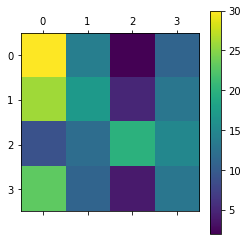

In [46]:
plt.matshow(cm)
plt.colorbar()

  


#Citation for above code: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
Trying to use cross validation on random forest classifier

In [47]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

In [48]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state=2020, max_depth=3)
clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2020, splitter='best')

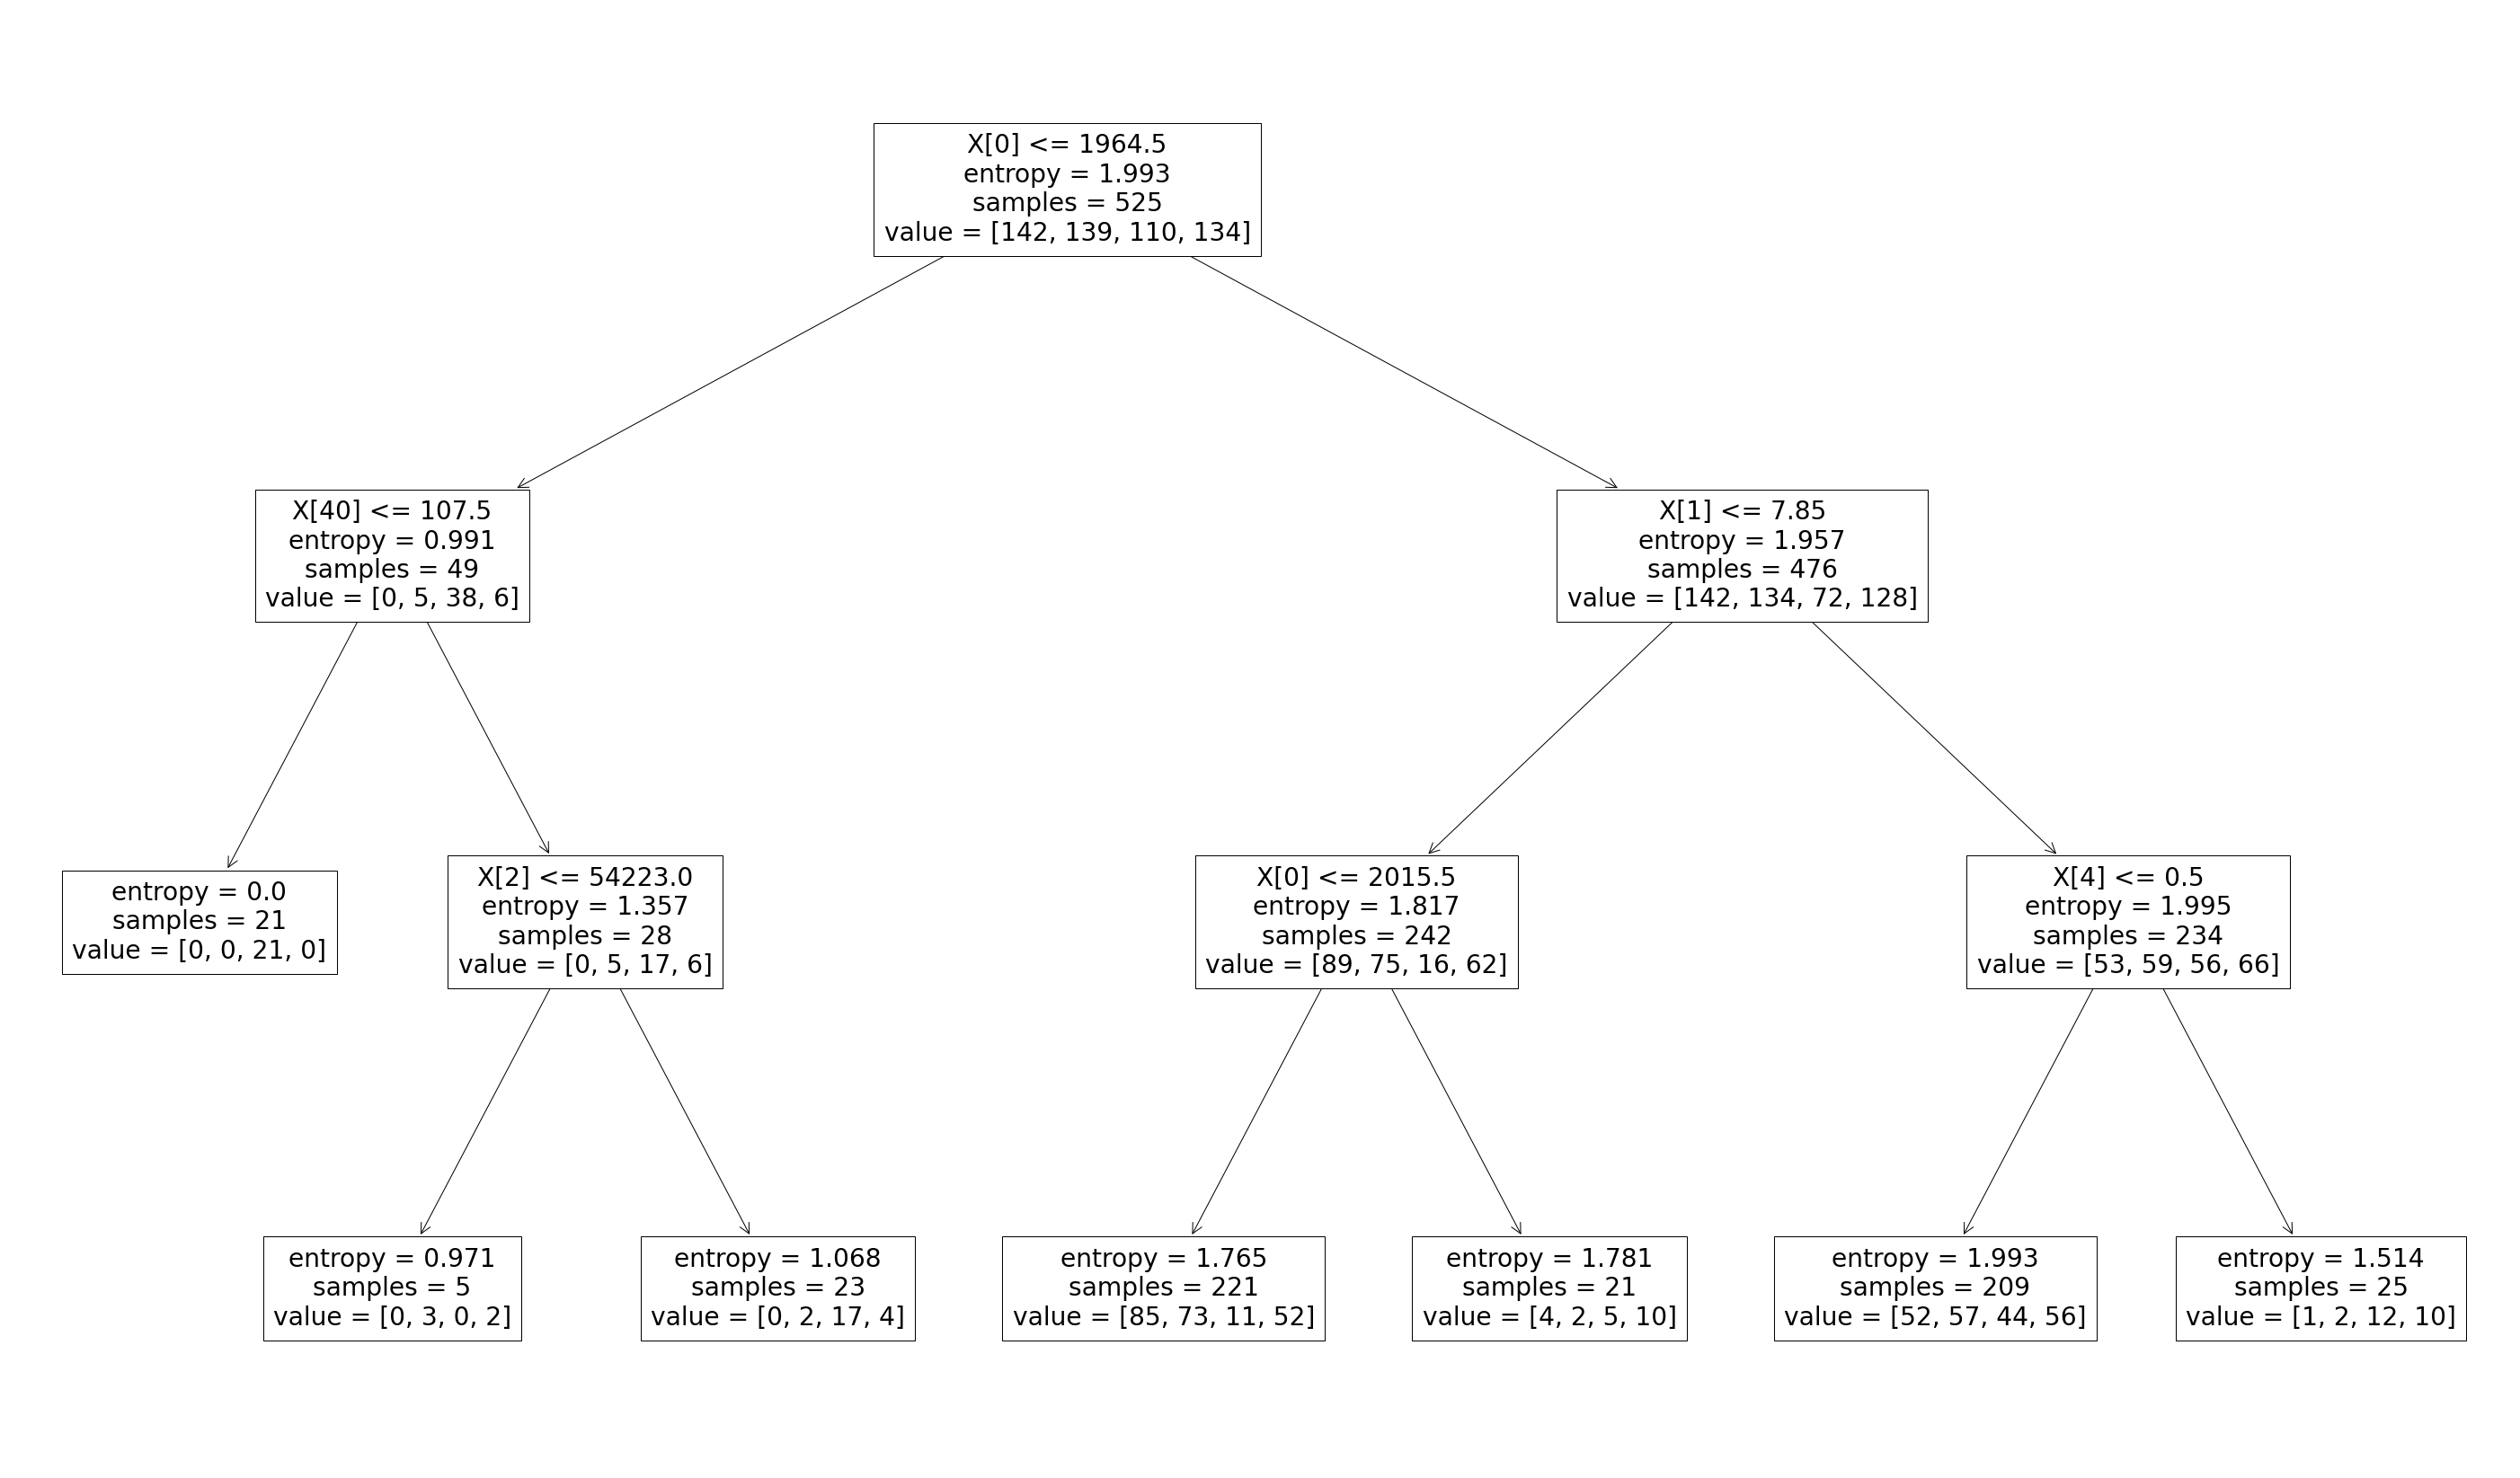

In [49]:
plt.figure(figsize = (50,30))
tree.plot_tree(clf)
plt.savefig("movietree.png")
plt.show()